In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading the Dataset

In [2]:
data=pd.read_csv("Wine_clust.csv")

In [3]:
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [5]:
data.shape

(178, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [7]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [8]:
#determine number of clusters -elbow method to find the optimal value of k
#WCSS within the cluster sum of squares


In [9]:
from sklearn.cluster import KMeans

In [10]:
feature_set=data.iloc[:,[9,11]].values

In [11]:
type(feature_set)

numpy.ndarray

C:\Users\libin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


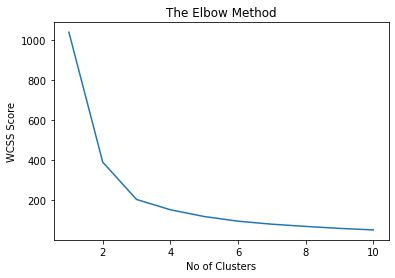

In [12]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42)
    kmeans.fit(feature_set)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("No of Clusters")
plt.ylabel("WCSS Score")
plt.show()

In [13]:
#from graph k=3

In [14]:
#train my data i should get 3 clusters

In [15]:
kmeans=KMeans(n_clusters=3,init="k-means++",n_init=10,random_state=42)
kmeans.fit(feature_set)

 
data["nw_col"]=kmeans.labels_

data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,nw_col
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


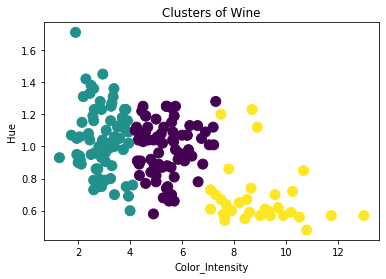

In [16]:
plt.scatter(data["Color_Intensity"],data["Hue"],s=100,c=data["nw_col"], label = "cluster1")
plt.title("Clusters of Wine")
plt.xlabel("Color_Intensity")
plt.ylabel("Hue")
plt.show()


In [17]:
for k in range(3,8):
    km=KMeans(n_clusters=k,init="k-means++",n_init=10,random_state=101)
    km.fit(feature_set)
    data[f'km_{k}']=km.labels_
    
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,nw_col,km_3,km_4,km_5,km_6,km_7
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0,0,2,0,3,4
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0,0,2,0,2,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0,0,2,0,3,4
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2,2,1,3,1,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0,0,2,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2,2,1,3,1,6
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2,2,1,3,1,6
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2,2,3,1,4,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2,2,3,1,4,3


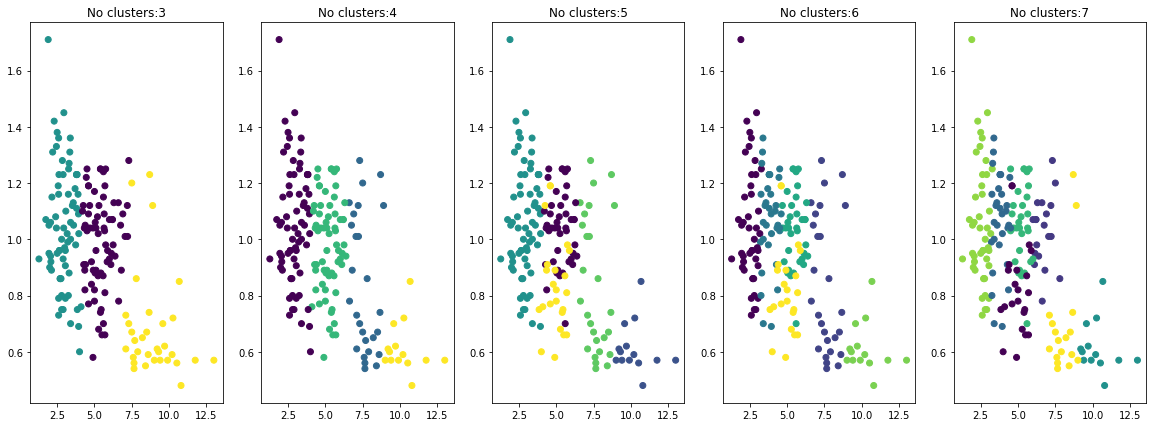

In [18]:
fig,axs=plt.subplots(nrows=1,ncols=5,figsize=(20,7))

for i,ax in enumerate(fig.axes,start=3):
    ax.scatter(x=data['Color_Intensity'],y=data['Hue'],c=data[f'km_{i}'])
    ax.set_title(f"No clusters:{i}")

In [19]:
from sklearn.manifold import TSNE

C:\Users\libin\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


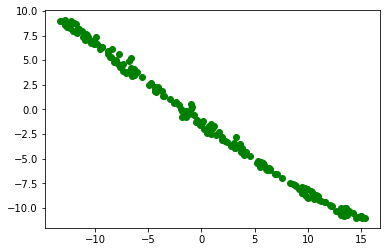

In [20]:
model=TSNE(learning_rate=100)
transformed=model.fit_transform(data)
xs=transformed[:,0]
ys=transformed[:,1]
plt.scatter(xs,ys,c='g')
plt.show()

# Agglomerative Hierarchical Clustering

In [21]:
from scipy.cluster.hierarchy import linkage,dendrogram

In [22]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data.iloc[:,:]=sc.fit_transform(data)

In [23]:
data.describe().round(3)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,nw_col,km_3,km_4,km_5,km_6,km_7
count,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000
mean,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000
std,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003
min,-2.434,-1.433,-3.679,-2.671,-2.088,-2.107,-1.696,-1.868,-2.069,-1.634,-2.095,-1.895,-1.493,-1.040,-1.040,-1.093,-1.389,-1.240,-1.657
25%,-0.788,-0.659,-0.572,-0.689,-0.824,-0.885,-0.828,-0.740,-0.597,-0.795,-0.768,-0.952,-0.785,-1.040,-1.040,-1.093,-1.199,-1.090,-0.620
50%,0.061,-0.423,-0.024,0.002,-0.122,0.096,0.106,-0.176,-0.063,-0.159,0.033,0.238,-0.234,0.321,0.321,-0.125,0.132,-0.040,0.417
75%,0.836,0.670,0.698,0.602,0.510,0.809,0.849,0.610,0.629,0.494,0.713,0.789,0.758,0.321,0.321,0.843,0.893,0.559,0.935
max,2.260,3.109,3.156,3.155,4.371,2.540,3.063,2.402,3.485,3.435,3.302,1.961,2.971,1.682,1.682,1.811,1.654,1.758,1.454


In [24]:
mergings=linkage(data,method="average")

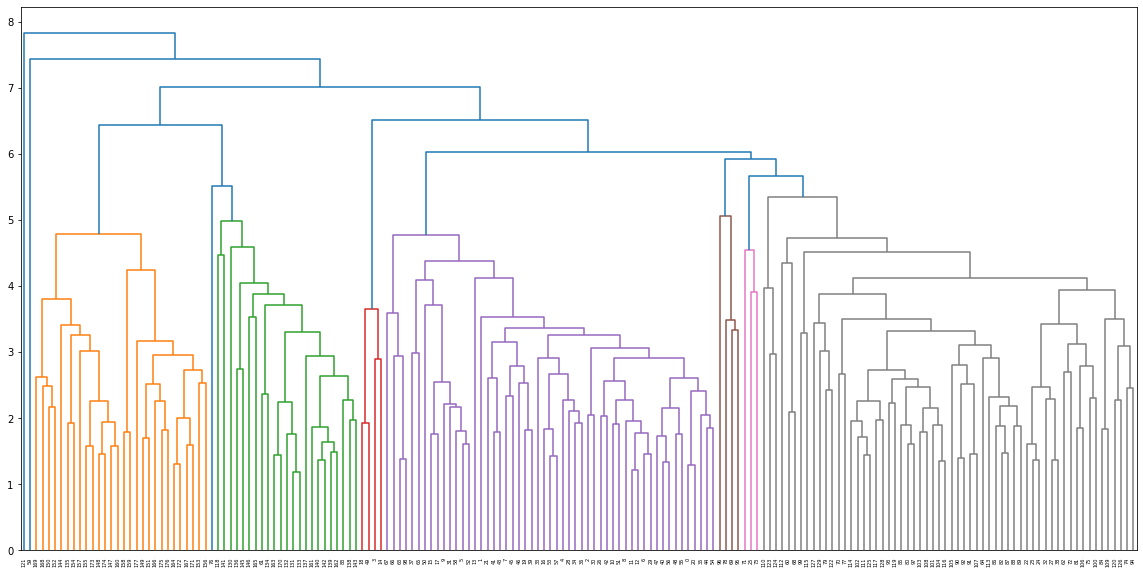

In [26]:
plt.figure(figsize=(20,10))
dendrogram(mergings, labels=data.index,leaf_rotation=90)#inter cluster distance matrix
plt.show()

# PCA

In [27]:
from sklearn.decomposition import PCA
pc = PCA(n_components=2)

In [28]:
pc_arr=pc.fit_transform(data)
pc_arr.shape

(178, 2)

In [29]:
trans_data=pd.DataFrame(pc_arr,columns=["Alcohol","Malic_Acid"])

In [30]:
trans_data

,Alcohol,Malic_Acid
0,-3.804969,-1.535927
1,-2.945069,-0.734877
2,-3.059221,-1.171079
3,-2.315818,-1.002085
4,-1.824472,-1.195156
...,...,...
173,4.144063,-0.614815
174,3.498949,-0.133433
175,3.207315,-3.058488
176,2.951297,-2.690862


In [31]:
trans_data.corr().round(2)

,Alcohol,Malic_Acid
Alcohol,1.0,-0.0
Malic_Acid,-0.0,1.0


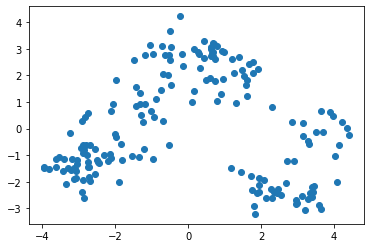

In [32]:
plt.scatter(trans_data["Alcohol"],trans_data["Malic_Acid"])
plt.show()

In [33]:
pc.explained_variance_ratio_ *100 

array([29.43038263, 19.92903657])

In [34]:
from scipy.cluster.hierarchy import linkage,dendrogram

In [35]:
mergings=linkage(data,method="complete")

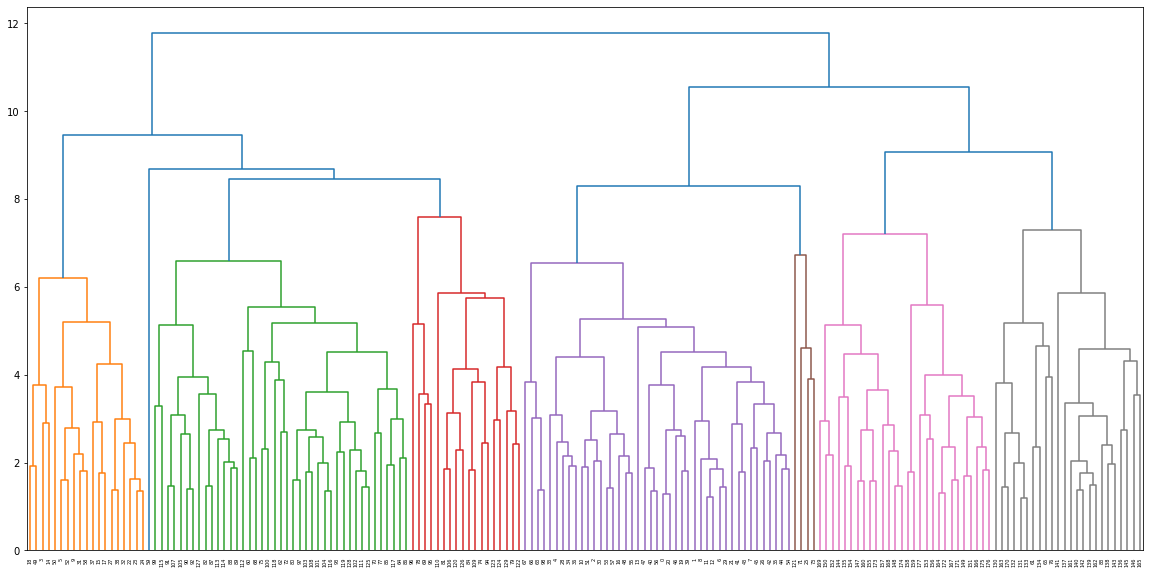

In [36]:
plt.figure(figsize=(20,10))
dendrogram(mergings, labels=data.index,leaf_rotation=90)#inter cluster distance matrix
plt.show()